# Statistics Exercise 3: Mystery MLE

In this exercise we will generate a toy dataset and fit an exponential distribution to it using maximum likelihood estimation.

**Questions:**
  1. Sample 100,000 times from a Bernoulli random variable with parameter p=0.1 and save the results in a variable *sample*. It is recommended to use the function np.random.binomial for this. *sample* should be a NumPy array of length 100,000 containing elements 0 and 1.
  2. In a new variable *sample2*, store the lengths of successive strings of zeroes in *sample*. For example, if the first elements in *sample* are \[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, ...\], then the first elements in *sample2* will be \[2, 4, 0, 5, ...\].
  3. Plot a histogram of *sample2* using the parameter density=True. What familiar type of probability distribution does this look like?
  4. In general, given sample $x_1, x_2, \ldots, x_n$, what is the MLE $\hat{\theta}$ for the parameter $\theta$ of the distribution given in (3)? Hint: Calculate the log-likelihood of the distribution, differentiate with respect to $\theta$ and equate to zero.
  5. What is the MLE for the parameter of the distribution in (3), given the sample data?
  6. Plot the distribution in (3) with parameter $\theta_{MLE}$ on top of the histogram. It should closely fit the data.

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm



In [135]:
%matplotlib notebook

In [136]:
# 1.Sample 100,000 times from a Bernoulli random variable with parameter p=0.1 
# and save the results in a variable sample. 
# It is recommended to use the function np.random.binomial for this. 
# sample should be a NumPy array of length 100,000 containing elements 0 and 1.

variable_sample = np.random.binomial(1, 0.1, 100000)

In [137]:
occurrences_non_zero = np.count_nonzero(variable_sample)
print('the occurrences of 1 in variable_sample  {} is {} times'.format(variable_sample,occurrences_non_zero))

the occurrences of 1 in variable_sample  [0 0 1 ... 0 0 0] is 9964 times


In [138]:
# 2.In a new variable sample2, store the lengths of successive strings of zeroes in sample. 
# For example, if the first elements in sample are [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, ...],
# then the first elements in sample2 will be [2, 4, 0, 5, ...].

def lengths_of_successive_strings_of_zeroes(arr):
    new_sample = []
    count = 0
    for elem in arr:
        if elem == 0:
            count += 1
        else:
            new_sample.append(count)
            count = 0
    return new_sample

lengths_of_successive_strings_of_zeroes([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])#test the function

[2, 4, 0, 5]

This hist looks like the exponential distribution 
It is mostly used for testing product reliability. 
It’s also an important distribution for building continuous-time Markov chains. 
The exponential often models waiting times and can help you to answer questions like:
    “How much time will go by before a major hurricane hits the Atlantic Seaboard?” or
    “How long will the transmission in my car last before it breaks?”.


<IPython.core.display.Javascript object>


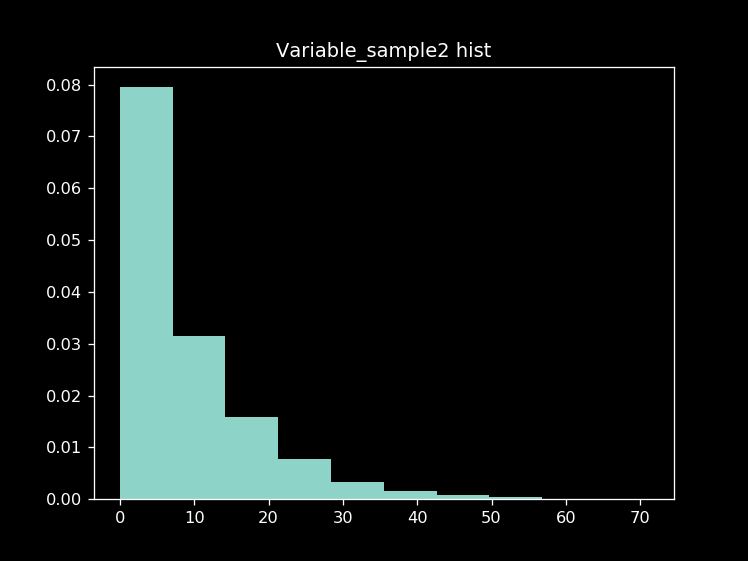

In [143]:
# 3.Plot a histogram of sample2 using the parameter density=True. 
variable_sample2 = lengths_of_successive_strings_of_zeroes(variable_sample)

# What familiar type of probability distribution does this look like?
print('''This hist looks like the exponential distribution 
It is mostly used for testing product reliability. 
It’s also an important distribution for building continuous-time Markov chains. 
The exponential often models waiting times and can help you to answer questions like:
    “How much time will go by before a major hurricane hits the Atlantic Seaboard?” or
    “How long will the transmission in my car last before it breaks?”.''')
plt.hist(variable_sample2, density=True)
plt.title('Variable_sample2 hist')
plt.style.use('dark_background')
plt.show()

In [211]:
# 4.In general, given sample  𝑥1,𝑥2,…,𝑥𝑛 , what is the MLE  𝜃̂   for the parameter  𝜃  
# of the distribution given in (3)? Hint: Calculate the log-likelihood of the distribution, 
# differentiate with respect to  𝜃  and equate to zero.



variable_mean = np.mean(variable_sample2)
variable_min = np.min(variable_sample2)
variable_max = np.max(variable_sample2)
x = np.linspace(variable_min, variable_max, 100)
lambd =  1 / variable_mean
y = (expon.pdf(x*lambd))*lambd
np.std(x)

20.701929024123945

In [210]:
# 5.What is the MLE for the parameter of the distribution in (3), given the sample data?
variable_mean

9.035828984343636

<IPython.core.display.Javascript object>


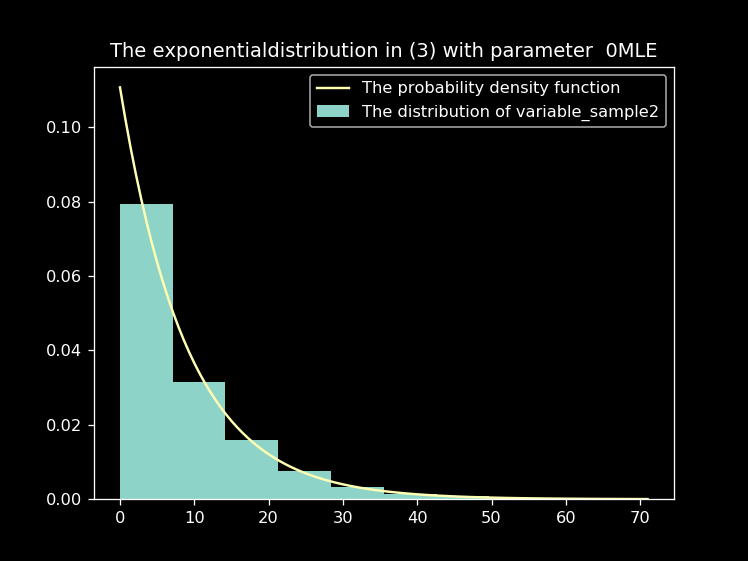

In [217]:
# 6.Plot the distribution in (3) with parameter  𝜃𝑀𝐿𝐸  on top of the histogram. 
# It should closely fit the data.
plt.hist(variable_sample2, density=True, label='The distribution of variable_sample2',)
plt.plot(x, y, label='The probability density function')
plt.title('The exponentialdistribution in (3) with parameter  0MLE')
plt.legend()
plt.show()
